Reading all traffic reports data from `.xlsx` file and store it to variable `REPORTS`.

In [1]:
import pandas as pd

path = "../Data/traffic_reports_2022_2023_2024.xlsx"
years = [2022, 2023, 2024]
REPORTS = {}

for year in years:
    REPORTS[year] = pd.read_excel(path, sheet_name=str(year))

Printing some informations about traffic reports data from specific year.

In [19]:
year = 2024
reports = REPORTS[year]

print(f"Year: {year}")
print(f"# of Samples: {reports.shape[0]}")
print(f"# of Attributes: {reports.shape[1]}\n")
print(f"Attributes: {reports.columns}\n")

for attribute in reports.columns:
    idx = reports[attribute].first_valid_index() # index of first non-nan value
    example = reports[attribute][idx] if idx is not None else "None"
    print(f"{attribute}: {example}")

Year: 2024
# of Samples: 58278
# of Attributes: 27

Attributes: Index(['LegacyId', 'Datum', 'Operater', 'A1', 'B1', 'C1', 'A2', 'B2', 'C2',
       'TitlePomembnoSLO', 'ContentPomembnoSLO', 'TitleNesreceSLO',
       'ContentNesreceSLO', 'TitleZastojiSLO', 'ContentZastojiSLO',
       'TitleVremeSLO', 'ContentVremeSLO', 'TitleOvireSLO', 'ContentOvireSLO',
       'TitleDeloNaCestiSLO', 'ContentDeloNaCestiSLO', 'TitleOpozorilaSLO',
       'ContentOpozorilaSLO', 'TitleMednarodneInformacijeSLO',
       'ContentMednarodneInformacijeSLO', 'TitleSplosnoSLO',
       'ContentSplosnoSLO'],
      dtype='object')

LegacyId: 1435597
Datum: 2024-01-01 01:30:56
Operater: DARS Mitja Terbovc, GNC
A1: <p><strong>Pozor!</strong></p><p>Okvarjeno vozilo ovira promet na primorski avtocesti v predoru Kastelec proti Ljubljani, zaprt je vozni pas. Vozite previdno, nevarnost naleta!</p>
B1: <p><strong>Ovire</strong></p><p>Na primorski avtocesti, pred priključkom Kozina v smeri Ljubljane, okvara vozila, ovira prome

Visualizing counts of usable attribute values for every year from `traffic_reports_2022_2023_2024.xlsx` file.

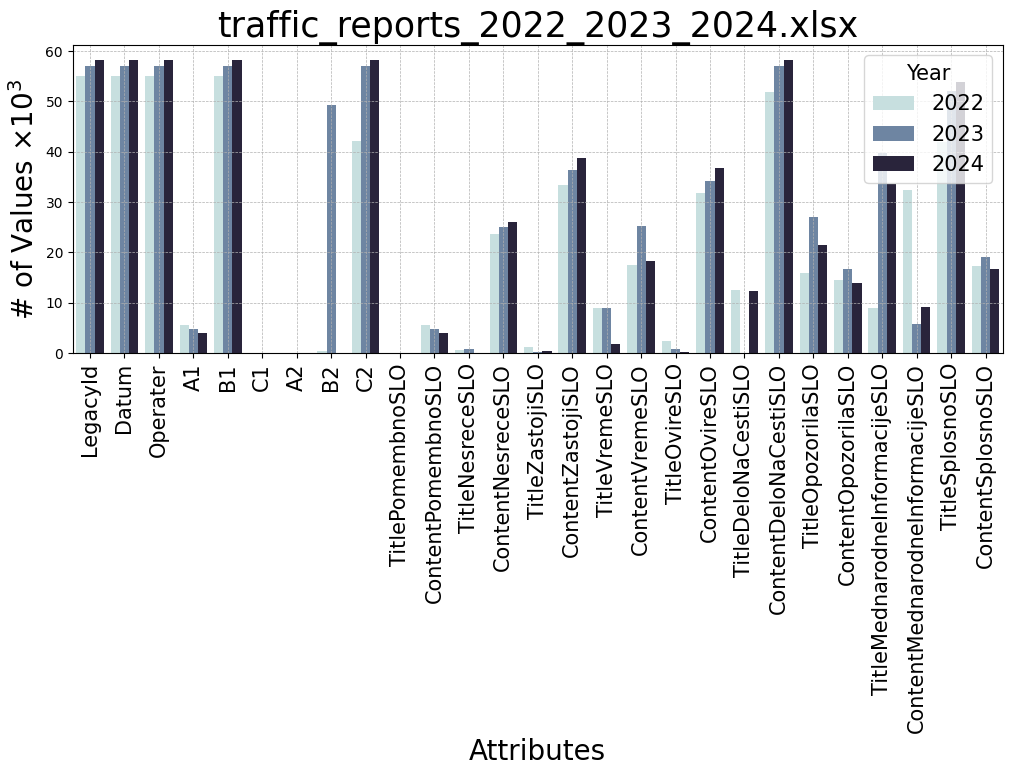

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

non_nan_counts = {}

for year in years:
    non_nan_counts[year] = REPORTS[year].notna().sum() / 1000

df_counts = pd.DataFrame(non_nan_counts)
df_counts = df_counts.reset_index().melt(id_vars="index", var_name="Year", value_name="Non-NaN Count")
df_counts

plt.figure(figsize=(12, 4))
sns.barplot(data=df_counts, x="index", y="Non-NaN Count", hue="Year", palette="ch:start=.2,rot=-.3")
plt.xticks(rotation=90, fontsize=15)
plt.xlabel("Attributes", fontsize=20)
plt.ylabel("# of Values $×10^3$", fontsize=20)
plt.title("traffic_reports_2022_2023_2024.xlsx", fontsize=25)
plt.legend(title="Year", fontsize=15, title_fontsize=15, loc = "upper right")
plt.grid(linestyle = '--', linewidth = 0.5)
plt.savefig("../Images/traffic_reports_analysis.pdf", format="pdf", bbox_inches="tight")
plt.show()